In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIML Proj/Datasets/Reviews.csv")

In [ ]:
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


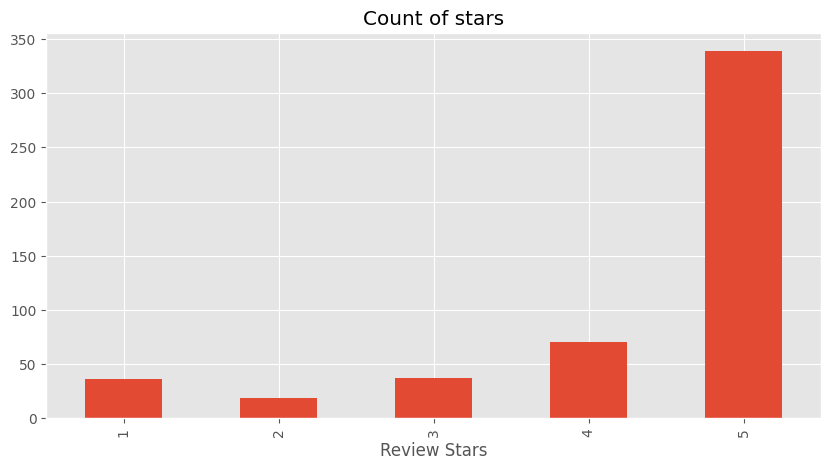

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind="bar",
                                             title="Count of stars",
                                             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
eg = df['Text'][150]
print(eg)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = nltk.word_tokenize(eg)
print(tokens[:10])

['This', 'is', 'a', 'fabulous', 'marinade', '!', 'I', 'love', 'to', 'use']


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
print(tagged[:10])

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('fabulous', 'JJ'), ('marinade', 'NN'), ('!', '.'), ('I', 'PRP'), ('love', 'VBP'), ('to', 'TO'), ('use', 'VB')]


In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
 nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  fabulous/JJ
  marinade/NN
  !/.
  I/PRP
  love/VBP
  to/TO
  use/VB
  it/PRP
  for/IN
  chicken/NN
  ,/,
  either/DT
  baked/VBN
  in/IN
  the/DT
  oven/NN
  OR/NNP
  on/IN
  the/DT
  grill/NN
  ./.
  This/DT
  has/VBZ
  enough/JJ
  flavor/NN
  &/CC
  flair/NN
  ,/,
  I/PRP
  've/VBP
  even/RB
  used/VBN
  it/PRP
  for/IN
  dinner/NN
  parties/NNS
  ,/,
  only/RB
  to/TO
  receive/VB
  rave/VB
  reviews/NNS
  from/IN
  my/PRP$
  guests/NNS
  !/.
  !/.
  DEFINITELY/NNP
  worth/IN
  the/DT
  price/NN
  !/.
  Super/NNP
  cheap/NN
  and/CC
  super/JJ
  easy/NN
  !/.
  Love/VB
  it/PRP
  !/.)


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia

In [ ]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores('This is worst')

{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores('Hey whats up')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores(eg)

{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index' :'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


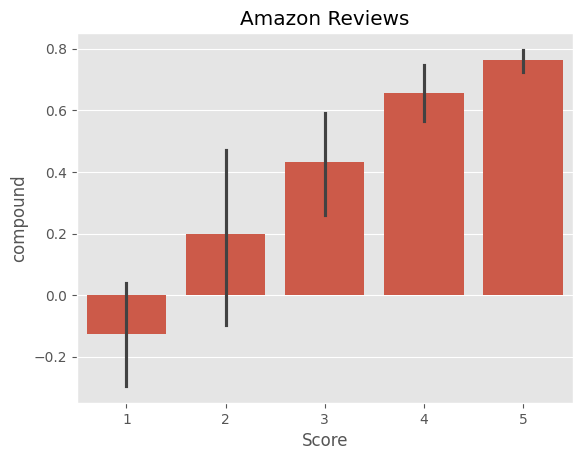

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Amazon Reviews')
plt.show()

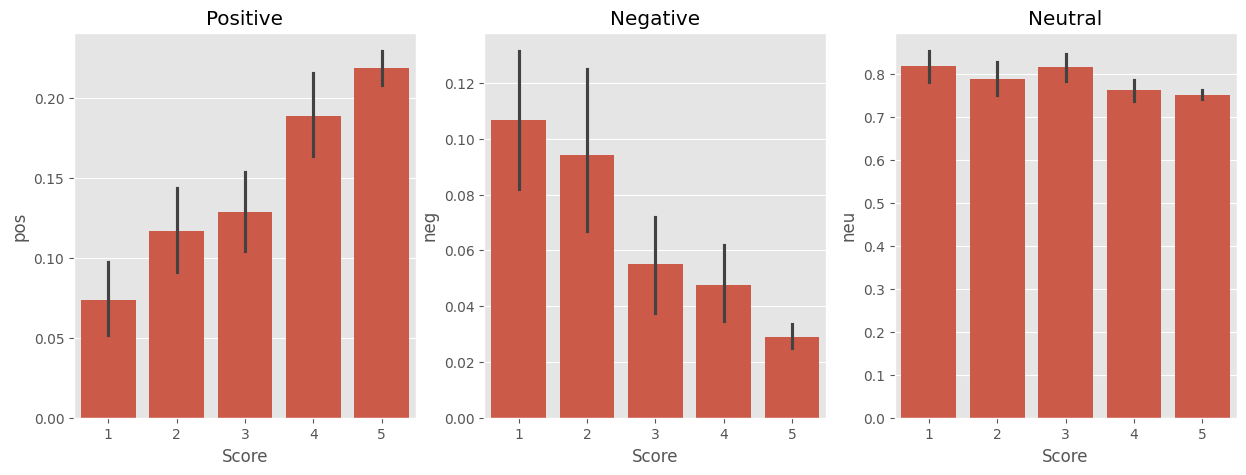

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.show()

Roborta and Transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
### Vaders Model
print(eg)
sia.polarity_scores(eg)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!


{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}

In [ ]:
### Roberta Model
encoded_text = tokenizer(eg, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'rob_neg' : scores[0],
    'rob_neu' : scores[1],
    'rob_pos' : scores[2]
}
print(scores_dict)

{'rob_neg': 0.0015664423, 'rob_neu': 0.006832089, 'rob_pos': 0.9916014}


In [ ]:
def polarity_scores_roberta(eg) :
  encoded_text = tokenizer(eg, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'rob_neg' : scores[0],
      'rob_neu' : scores[1],
      'rob_pos' : scores[2]
  }
  return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try :
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    both = {**vader_result_rename, **roberta_result}
    roberta_result = polarity_scores_roberta(text)
    res[myid] = both
  except RuntimeError :
    print(f"Broke for id : {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id : 83
Broke for id : 187


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index' :'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
  results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'rob_neg', 'rob_neu', 'rob_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

Comparing Vaders and Roberta

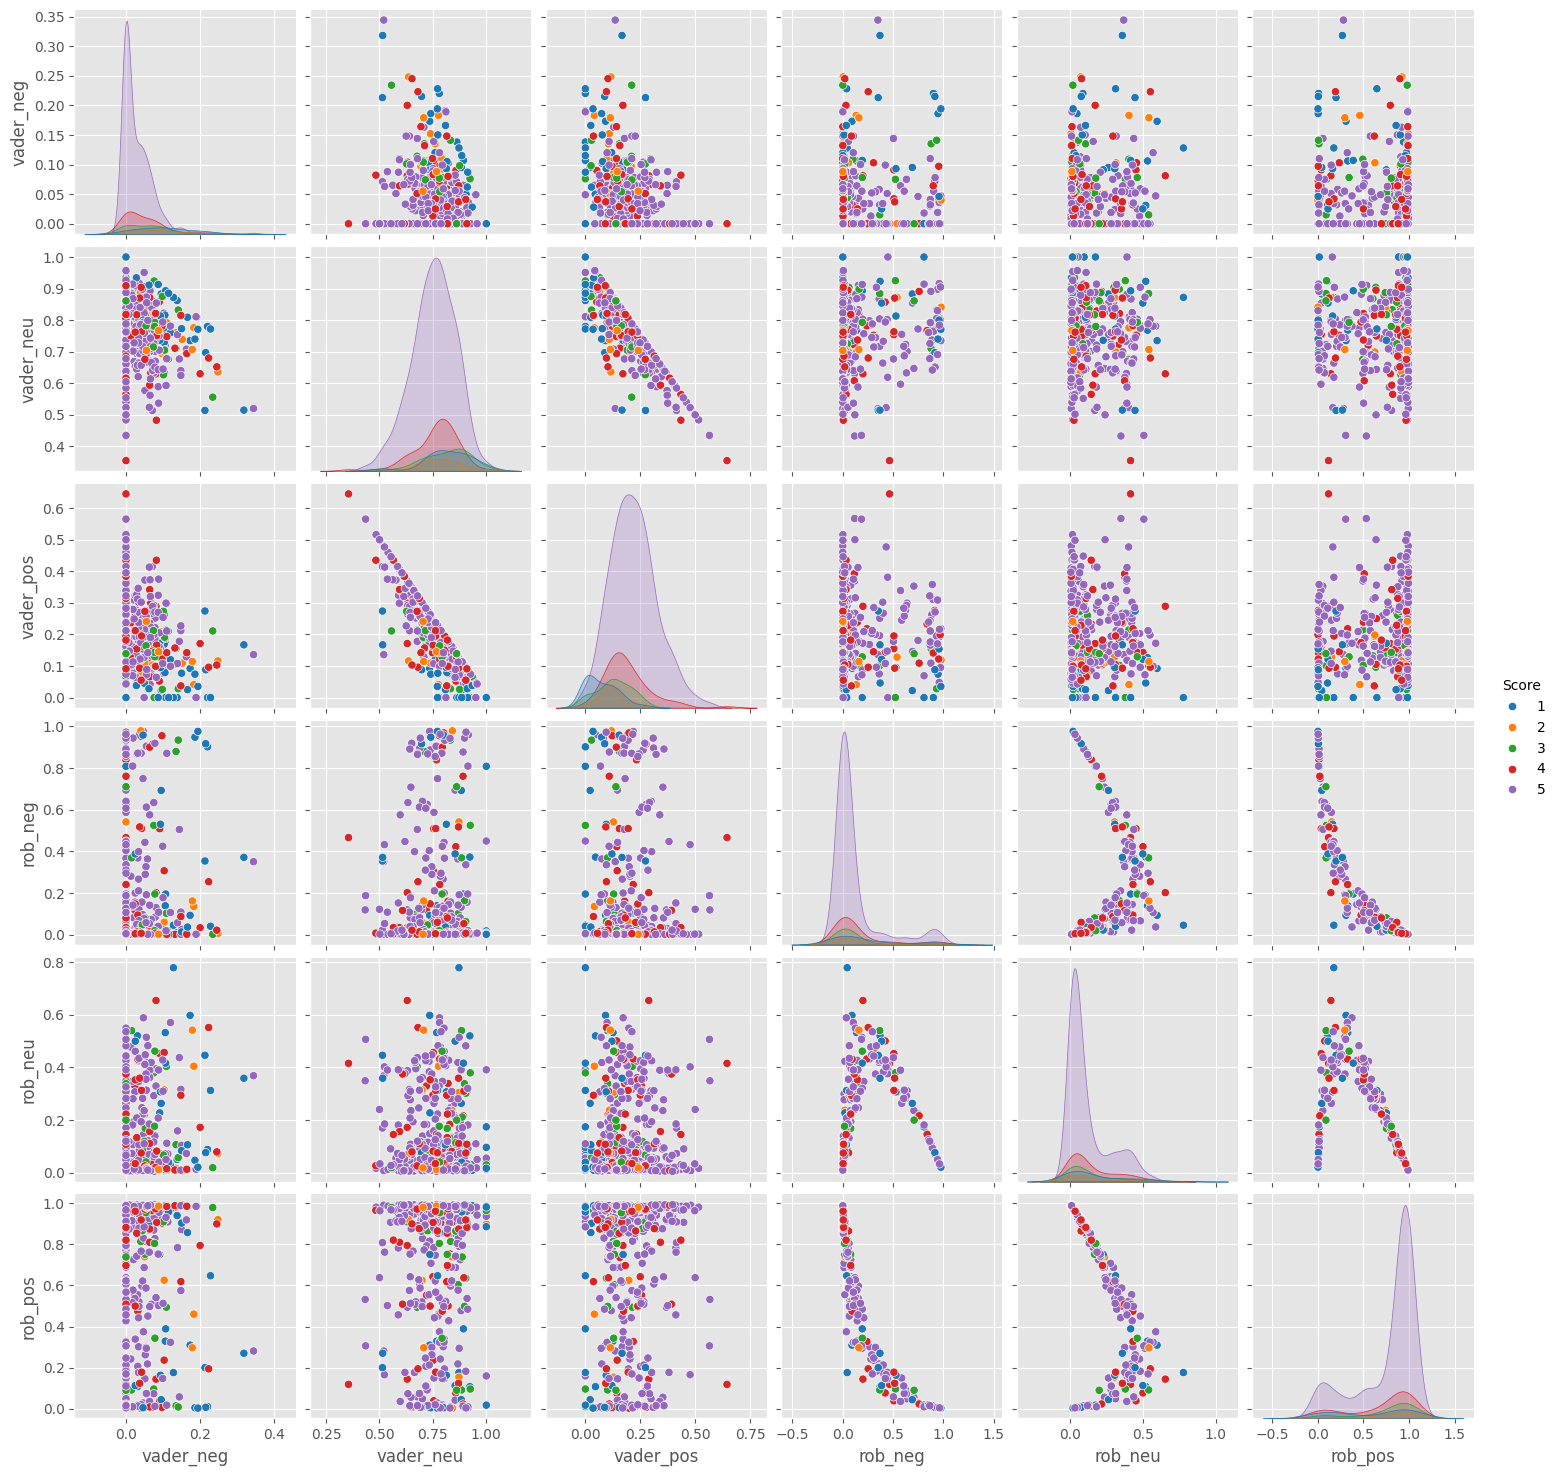

In [ ]:
sns.pairplot(data=results_df,
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'rob_neg', 'rob_neu', 'rob_pos'],
             hue='Score',
             palette='tab10')
plt.show()